In [73]:
import random
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sigmoid import sigmoid_func

In [74]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [75]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

In [76]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [77]:
df.shape

(918, 12)

In [78]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [79]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [81]:
df.FastingBS=df.FastingBS.astype('str')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


In [83]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS          object
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [84]:
object_columns=[]
numerical_columns=[]
for column in df.columns:
    if df[column].dtype=='object':
        object_columns.append(column)
    else :
        numerical_columns.append(column)

print(object_columns)
print(numerical_columns)
    

['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [85]:
df_object=df[object_columns]
df_object.head(10)

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,0,Normal,N,Up
1,F,NAP,0,Normal,N,Flat
2,M,ATA,0,ST,N,Up
3,F,ASY,0,Normal,Y,Flat
4,M,NAP,0,Normal,N,Up
5,M,NAP,0,Normal,N,Up
6,F,ATA,0,Normal,N,Up
7,M,ATA,0,Normal,N,Up
8,M,ASY,0,Normal,Y,Flat
9,F,ATA,0,Normal,N,Up


In [86]:
df_numerical=df_numerical = df[[column for column in numerical_columns if column != 'HeartDisease']]
df_numerical.sample(5)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
187,41,120,237,138,1.0
327,59,125,0,119,0.9
195,62,160,193,116,0.0
548,66,112,261,140,1.5
708,54,110,206,108,0.0


In [87]:
df_numerical.nunique()

Age             50
RestingBP       67
Cholesterol    222
MaxHR          119
Oldpeak         53
dtype: int64

In [88]:
df_object.nunique()

Sex               2
ChestPainType     4
FastingBS         2
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

One Hot Encoding

In [89]:
df_OHE=pd.get_dummies(df_object, drop_first=True)
df_OHE=df_OHE.astype('int64')
df_OHE.head(10)

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,1,1,0,0,0,1,0,0,0,1
1,0,0,1,0,0,1,0,0,1,0
2,1,1,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,1,1,0
4,1,0,1,0,0,1,0,0,0,1
5,1,0,1,0,0,1,0,0,0,1
6,0,1,0,0,0,1,0,0,0,1
7,1,1,0,0,0,1,0,0,0,1
8,1,0,0,0,0,1,0,1,1,0
9,0,1,0,0,0,1,0,0,0,1


In [90]:
dataframe = pd.concat([df_numerical, df_OHE], axis=1)
dataframe.sample(5)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
303,62,120,0,123,1.7,0,0,0,0,1,0,1,1,0,0
608,62,158,170,138,0.0,1,0,0,0,0,0,1,1,1,0
533,63,110,252,140,2.0,1,0,0,0,0,0,1,1,1,0
368,57,140,0,120,2.0,1,0,0,0,0,1,0,1,1,0
281,49,150,222,122,2.0,1,0,0,0,0,1,0,0,1,0


In [91]:
dataframe.shape

(918, 15)

In [92]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [93]:
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289         0     Normal    172   
1   49   F           NAP        160          180         0     Normal    156   
2   37   M           ATA        130          283         0         ST     98   
3   48   F           ASY        138          214         0     Normal    108   
4   54   M           NAP        150          195         0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [94]:
X=dataframe
y=df.HeartDisease
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f"X train:{X_train.shape}")
print(f"X test:{X_test.shape}")
print(f"Y train:{y_train.shape}")
print(f"Y test:{y_test.shape}")
X_train.head(5)

X train:(734, 15)
X test:(184, 15)
Y train:(734,)
Y test:(184,)


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
795,42,120,240,194,0.8,1,0,1,0,1,1,0,0,0,0
25,36,130,209,178,0.0,1,0,1,0,0,1,0,0,0,1
84,56,150,213,125,1.0,1,0,0,0,1,1,0,1,1,0
10,37,130,211,142,0.0,0,0,1,0,0,1,0,0,0,1
344,51,120,0,104,0.0,1,0,0,0,1,1,0,0,1,0


In [97]:
from sklearn.preprocessing import LabelEncoder

# Encode each categorical column
encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = encoder.fit_transform(df[col])


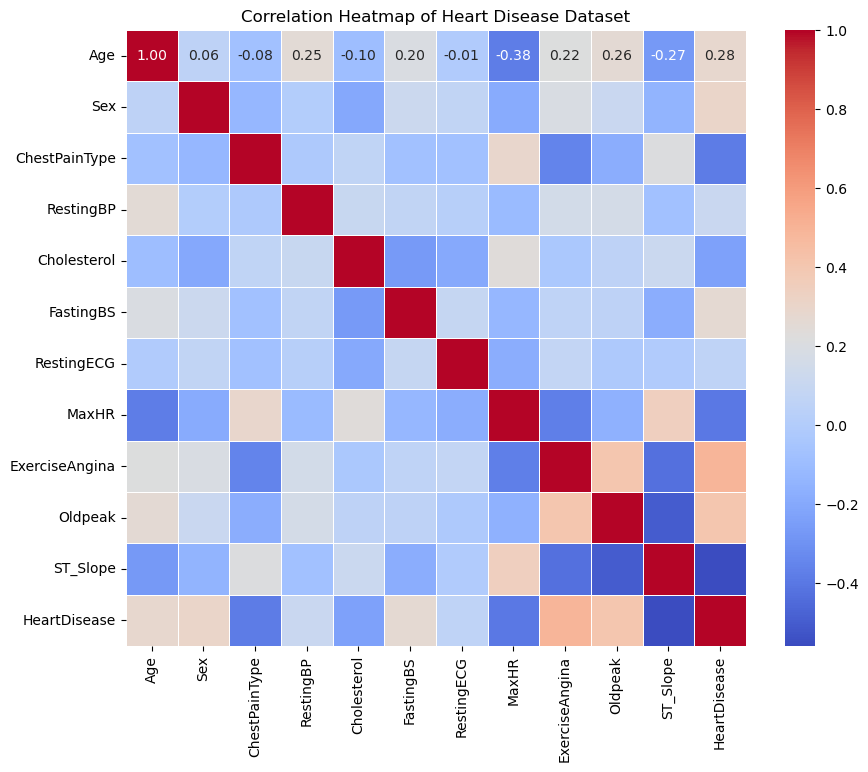

In [98]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.show()
